### Linear Regression
- see if increase/decrease in the number of businesses (in %) correlate to the fluctuation in rent

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pyproj import Proj, transform
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
import ast
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso, Ridge
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import necessary csv files - williamsburg
yelp_cumsum_rent_williamsburg_df = pd.read_csv('csv/yelp_cumsum_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_williamsburg_df.index = pd.to_datetime(yelp_cumsum_rent_williamsburg_df.index)
yelp_williamsburg_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
yelp_williamsburg_cumsum_perc_inc_df.index = pd.to_datetime(yelp_williamsburg_cumsum_perc_inc_df.index)

# studio - rent
rent_studio = pd.read_csv('csv/Zip_MedianRentalPrice_Studio.csv')
zip_code_list = pd.read_csv('csv/zipcode_by_neighborhood.csv', index_col = 0)
zip_code_list['zipcodes'] = zip_code_list['zipcodes'].apply(lambda x: ast.literal_eval(x)) 

In [358]:
# import necessary csv files - bushwick
yelp_cumsum_rent_bushwick_df = pd.read_csv('csv/yelp_cumsum_rent_bushwick.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_bushwick_df.index = pd.to_datetime(yelp_cumsum_rent_bushwick_df.index)
yelp_bushwick_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_bushwick.csv', index_col = ['Unnamed: 0'])
yelp_bushwick_cumsum_perc_inc_df.index = pd.to_datetime(yelp_bushwick_cumsum_perc_inc_df.index)

In [4]:
# import necessary csv files - east harlem
yelp_cumsum_rent_east_harlem_df = pd.read_csv('csv/yelp_cumsum_rent_east_harlem.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_east_harlem_df.index = pd.to_datetime(yelp_cumsum_rent_east_harlem_df.index)
yelp_east_harlem_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_east_harlem.csv', index_col = ['Unnamed: 0'])
yelp_east_harlem_cumsum_perc_inc_df.index = pd.to_datetime(yelp_east_harlem_cumsum_perc_inc_df.index)

In [196]:
# import necessary csv files - east harlem
yelp_cumsum_rent_chelsea_clinton_df = pd.read_csv('csv/yelp_cumsum_rent_chelsea_clinton.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_chelsea_clinton_df.index = pd.to_datetime(yelp_cumsum_rent_chelsea_clinton_df.index)
yelp_chelsea_clinton_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_chelsea_clinton.csv', index_col = ['Unnamed: 0'])
yelp_chelsea_clinton_cumsum_perc_inc_df.index = pd.to_datetime(yelp_chelsea_clinton_cumsum_perc_inc_df.index)

In [5]:
williamsburg_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Williamsburg']
williamsburg_zip = williamsburg_zip_['zipcodes'].values[0]

In [6]:
def get_rent_for_neighborhood(zip_list):
    df = pd.DataFrame(columns = list(rent_studio.columns) )
    for zip_ in zip_list:
        rent = rent_studio[rent_studio['RegionName'] == int(zip_)]
        df= pd.concat([df,rent])
    return df

In [7]:
williamsburg_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Williamsburg']
williamsburg_zip = williamsburg_zip_['zipcodes'].values[0]
williamsburg_rent = get_rent_for_neighborhood(williamsburg_zip)

In [8]:
# rent_studio_williamsburg = williamsburg_rent.reset_index()
# rent_studio_williamsburg = rent_studio_williamsburg.transpose()
# rent_studio_williamsburg = rent_studio_williamsburg.dropna()
# rent_studio_williamsburg = rent_studio_williamsburg.iloc[7:,:]
# rent_studio_williamsburg.index = pd.to_datetime(rent_studio_williamsburg.index)
# rent_studio_williamsburg.columns= ['rent']

In [12]:
# rent_studio_williamsburg['%increase_rent'] = rent_studio_williamsburg.pct_change()

In [13]:
display(yelp_cumsum_rent_williamsburg_df.head())
yelp_williamsburg_cumsum_perc_inc_df.head()

,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_streetvendors,category_sushi,category_tacos,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars,rent,%increase_rent
2011-11-01,2,4,23,36,3,6,0,8,7,0,...,1,3,0,9,7,2,1,3,2250,NaN
2011-12-01,2,4,23,39,3,7,0,8,8,0,...,1,3,0,9,7,2,1,3,2400,0.066667
2012-01-01,2,4,23,40,3,7,0,8,8,1,...,1,3,0,9,8,2,1,3,2600,0.083333
2012-02-01,2,4,23,40,3,7,0,8,8,1,...,1,3,0,9,8,2,1,3,2224,-0.144423
2012-03-01,2,4,23,42,3,7,0,8,8,1,...,1,3,0,9,8,2,1,3,2400,0.078894


,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_seafood,category_spanish,category_streetvendors,category_sushi,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars,%increase_rent
2011-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,0.0,0.0,0.0,0.083333,0.0,0.166667,NaN,0.0,0.142857,NaN,...,0.0,2.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667
2012-01-01,0.0,0.0,0.0,0.025641,0.0,0.000000,NaN,0.0,0.000000,inf,...,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.083333
2012-02-01,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.144423
2012-03-01,0.0,0.0,0.0,0.050000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.078894


In [14]:
yelp_williamsburg_one_hot_cumsum = yelp_cumsum_rent_williamsburg_df.drop(['rent', '%increase_rent'], axis = 1)

In [359]:
yelp_bushwick_one_hot_cumsum = yelp_cumsum_rent_bushwick_df.drop(['rent'], axis = 1)

In [15]:
# drop businesses that are less than 5 in the area 
# take a look at the ones that are few - see if it's an interesting businesses?
business_counbt = yelp_williamsburg_one_hot_cumsum[yelp_williamsburg_one_hot_cumsum.index == '2018-08-01']
for col in business_count.columns:
    if business_count[col].values[0]<=5:
        yelp_williamsburg_one_hot_cumsum = yelp_williamsburg_one_hot_cumsum.drop([col], axis = 1)

In [364]:
yelp_williamsburg_one_hot_cumsum_top10_ = yelp_williamsburg_one_hot_cumsum[yelp_williamsburg_one_hot_cumsum.index == '2018-08']
yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum

In [365]:
yelp_bushwick_one_hot_cumsum_top10_ = yelp_bushwick_one_hot_cumsum[yelp_bushwick_one_hot_cumsum.index == '2018-08']
yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum

In [366]:
for col in yelp_williamsburg_one_hot_cumsum_top10_.columns:
    if yelp_williamsburg_one_hot_cumsum_top10_[col].values[0]<=33:
        yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum_top10.drop([col], axis = 1)

In [367]:
for col in yelp_bushwick_one_hot_cumsum_top10_.columns:
    if yelp_bushwick_one_hot_cumsum_top10_[col].values[0]<=15:
        yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum_top10.drop([col], axis = 1)

In [407]:
yelp_williamsburg_one_hot_cumsum_top10.to_csv('yelp_williamsburg_one_hot_cumsum_top10.csv')
yelp_bushwick_one_hot_cumsum_top10.to_csv('yelp_bushwick_one_hot_cumsum_top10.csv')

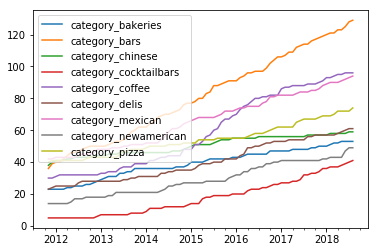

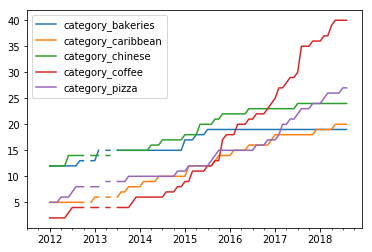

In [392]:
yelp_williamsburg_one_hot_cumsum_top10.plot()
plt.show()
yelp_bushwick_one_hot_cumsum_top10.plot()
plt.show()

In [19]:
# plt.bar(yelp_williamsburg_one_hot_cumsum[yelp_williamsburg_one_hot_cumsum.index == '2018-08'], height)

In [24]:
# yelp_williamsburg_one_hot_cumsum.index = pd.to_datetime(rent_studio_williamsburg.index)

In [25]:
yelp_williamsburg_one_hot_cumsum_perc_inc = yelp_williamsburg_one_hot_cumsum.pct_change()
yelp_williamsburg_one_hot_cumsum_perc_inc.head()

,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_seafood,category_spanish,category_streetvendors,category_sushi,category_tacos,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars
2011-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,0.0,0.0,0.0,0.083333,0.0,0.166667,NaN,0.0,0.142857,NaN,...,0.0,2.000000,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0
2012-01-01,0.0,0.0,0.0,0.025641,0.0,0.000000,NaN,0.0,0.000000,inf,...,0.0,0.000000,0.0,0.0,NaN,0.0,0.142857,0.0,0.0,0.0
2012-02-01,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.333333,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0
2012-03-01,0.0,0.0,0.0,0.050000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0


In [26]:
# yelp_cumsum_rent_williamsburg_df = pd.concat([yelp_williamsburg_one_hot_cumsum, rent_studio_williamsburg], axis = 1)

In [29]:
# yelp_williamsburg_cumsum_perc_inc_df = pd.concat([yelp_williamsburg_one_hot_cumsum_perc_inc, rent_studio_williamsburg], axis = 1)

In [286]:
# plt.scatter((yelp_cumsum_rent_east_harlem_df['category_coffee']), np.log(yelp_cumsum_rent_east_harlem_df['rent']))

In [287]:
# number of bars vs rent box cox, random forest regression - feature importances 
# plt.scatter(np.log(yelp_cumsum_rent_williamsburg_df['category_bars']), np.log(yelp_cumsum_rent_williamsburg_df['rent']))

### Linear Regression (Williamsburg)

In [277]:
# log transform
log_yelp_cumsum_rent_williamsburg_df = np.log(yelp_cumsum_rent_williamsburg_df)

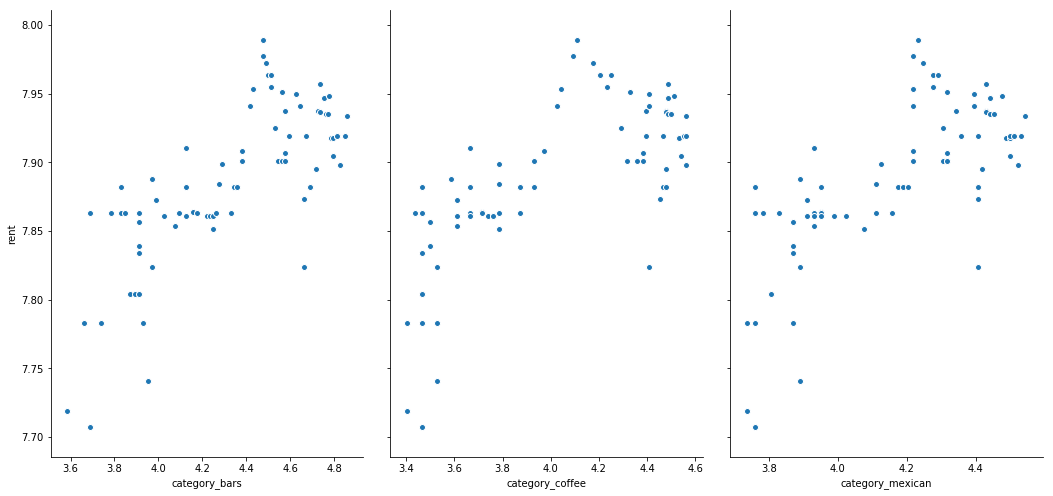

In [278]:
sns.pairplot(log_yelp_cumsum_rent_williamsburg_df, x_vars=['category_bars','category_coffee','category_mexican'], y_vars='rent', size=7, aspect=0.7)

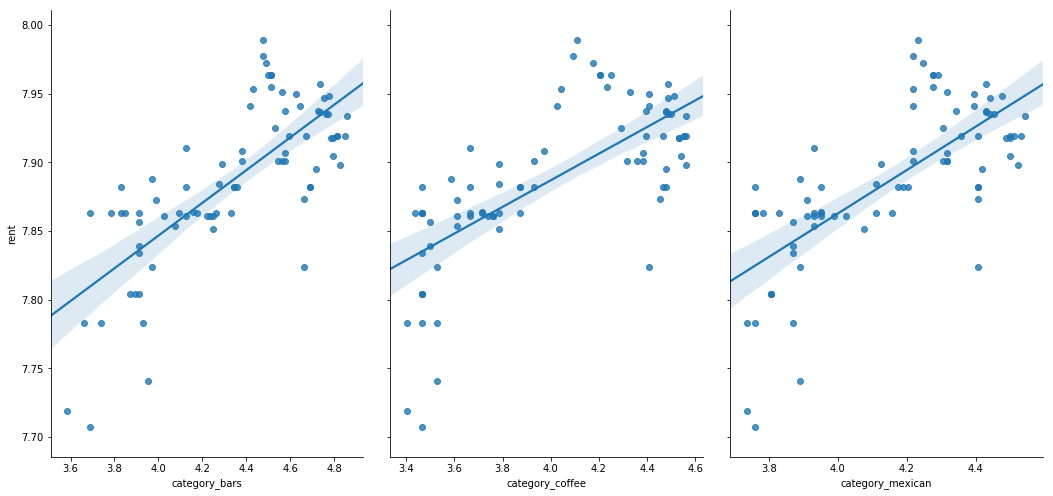

In [393]:
sns.pairplot(log_yelp_cumsum_rent_williamsburg_df, x_vars=['category_bars','category_coffee','category_mexican'], y_vars='rent', size=7, aspect=0.7, kind='reg')

In [382]:
# %matplotlib notebook
# plt.figure(figsize = (8,2.5))
# plt.subplot(121)
# plt.hist(yelp_cumsum_rent_bushwick_df['rent'], label='bushwick rent')
# plt.title('Bushwick Rent Distribution')
# plt.xlabel('Rent')
# plt.ylabel('Frequency')
# plt.legend()
# plt.subplot(122)
# plt.hist(yelp_cumsum_rent_bushwick_df['category_coffee'])
# plt.title('Bushwick Cafe')
# plt.xlabel('Number of Cafe')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [262]:
X_willamsburg_bars = np.log(yelp_cumsum_rent_williamsburg_df['category_bars'].values)
X_willamsburg_bars = np.reshape(X_willamsburg_bars, (len(X_willamsburg_bars),1))
y_willamsburg_bars = np.log((yelp_cumsum_rent_williamsburg_df['rent']).values)

In [398]:
### STATSMODELS for BAR COUNTS### 
# create a fitted model
lm1 = smf.ols(formula='rent ~ category_bars', data=log_yelp_cumsum_rent_williamsburg_df).fit()
# print the coefficients
print('< number of bars vs. rent >')
print(lm1.params)
display(lm1.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1.pvalues)
print('r-squared: '+ str(lm1.rsquared))

< number of bars vs. rent >
Intercept        7.370576
category_bars    0.119030
dtype: float64


,0,1
Intercept,7.266758,7.474393
category_bars,0.095173,0.142887


p-values: 
Intercept        9.909670e-98
category_bars    1.328065e-15
dtype: float64
r-squared: 0.5520452020453919


p-value for category_bars is far less than 0.05.

-> low probability that the coefficient for 'category_bars' is actually zero 
<br>
-> reject the null hypothesis
<br>
-> conclude that there is relationship between the # of bars and # of restaurant

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [399]:
### STATSMODELS FOR CAFE COUNTS###
lm1_coffee = smf.ols(formula='rent ~ category_coffee', data=log_yelp_cumsum_rent_williamsburg_df).fit()
# print the coefficients
print('< number of cafes vs. rent >')
print(lm1_coffee.params)
display(lm1_coffee.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1_coffee.pvalues)
print('r-squared: '+ str(lm1_coffee.rsquared))

< number of cafes vs. rent >
Intercept          7.499578
category_coffee    0.096854
dtype: float64


,0,1
Intercept,7.412079,7.587077
category_coffee,0.075086,0.118622


p-values: 
Intercept          2.974559e-104
category_coffee     1.696052e-13
dtype: float64
r-squared: 0.49496273625445


In [400]:
### STATSMODELS FOR MEXICAN COUNTS###
# create a fitted model
lm1_mexican = smf.ols(formula='rent ~ category_mexican', data=log_yelp_cumsum_rent_williamsburg_df).fit()
# print the coefficients
print('< number of mexican spots vs. rent >')
print(lm1_mexican.params)
display(lm1_mexican.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1_mexican.pvalues)
print('r-squared: '+ str(lm1_mexican.rsquared))

< number of mexican spots vs. rent >
Intercept           7.229686
category_mexican    0.158261
dtype: float64


,0,1
Intercept,7.085697,7.373675
category_mexican,0.123650,0.192873


p-values: 
Intercept           9.187460e-86
category_mexican    5.595991e-14
dtype: float64
r-squared: 0.5086112033349977


In [306]:
# combine them all to see if it performs better
lm1_multivariable = smf.ols(formula='rent ~ category_bars + category_coffee + category_mexican', data=log_yelp_cumsum_rent_williamsburg_df).fit()

# print the coefficients
lm1_multivariable.params

Intercept           7.589419
category_bars       0.300025
category_coffee    -0.018280
category_mexican   -0.224158
dtype: float64

In [311]:
lm1_multivariable.conf_int()

,0,1
Intercept,7.210525,7.968313
category_bars,0.132701,0.467349
category_coffee,-0.134015,0.097456
category_mexican,-0.502383,0.054068


In [313]:
lm1_multivariable.summary()
# bars has small p value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     35.56
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.37e-14
Time:                        11:08:41   Log-Likelihood:                 154.01
No. Observations:                  82   AIC:                            -300.0
Df Residuals:                      78   BIC:                            -290.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.5894      0.190     39.878      0.000       7.211       7.968
category_bars        0.3000      0.084      3.570      0.001       0.133       0.467
category_coffee     -0.0183      0.058     -0.314      0.754      -0.134       0.097
category_mexican    -0.2242      0.140     -1.604      0.113      -0.502       0.054
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.134
Skew:                          -0.098   Prob(JB):                        0.935
Kurtosis:                       2.969   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
linreg_ = linreg.LinearRegression()
model_willamsburg_bars = linreg_.fit(X_willamsburg_bars,y_willamsburg_bars)

In [281]:
print(model_willamsburg_bars.intercept_)
model_willamsburg_bars.coef_

7.370575623780645


array([0.11903])

In [32]:
yelp_cumsum_rent_williamsburg_df['rent'] = yelp_cumsum_rent_williamsburg_df['rent'].astype('int')

### Linear Regression (Bushwick)

In [370]:
log_yelp_cumsum_rent_bushwick_df = np.log(yelp_cumsum_rent_bushwick_df)

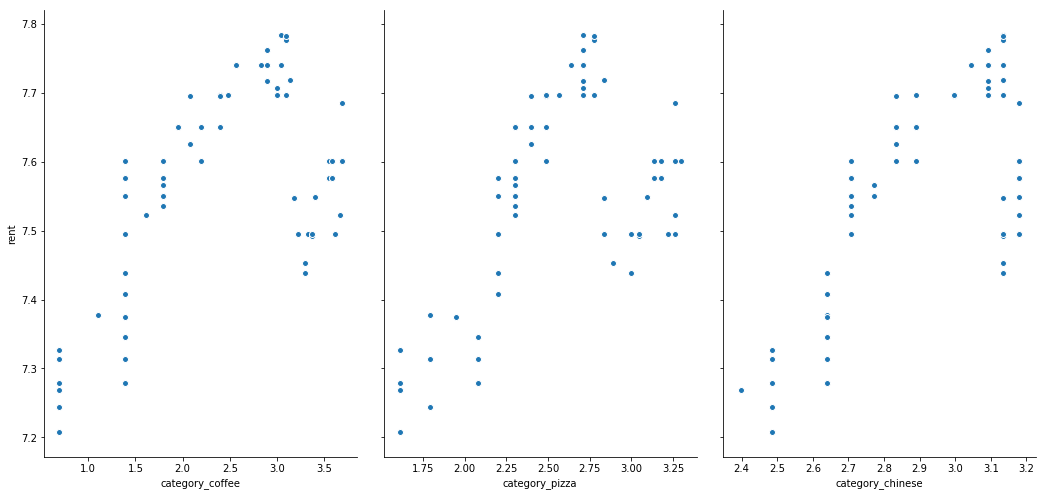

In [371]:
sns.pairplot(log_yelp_cumsum_rent_bushwick_df, x_vars=['category_coffee','category_pizza','category_chinese'], y_vars='rent', size=7, aspect=0.7)

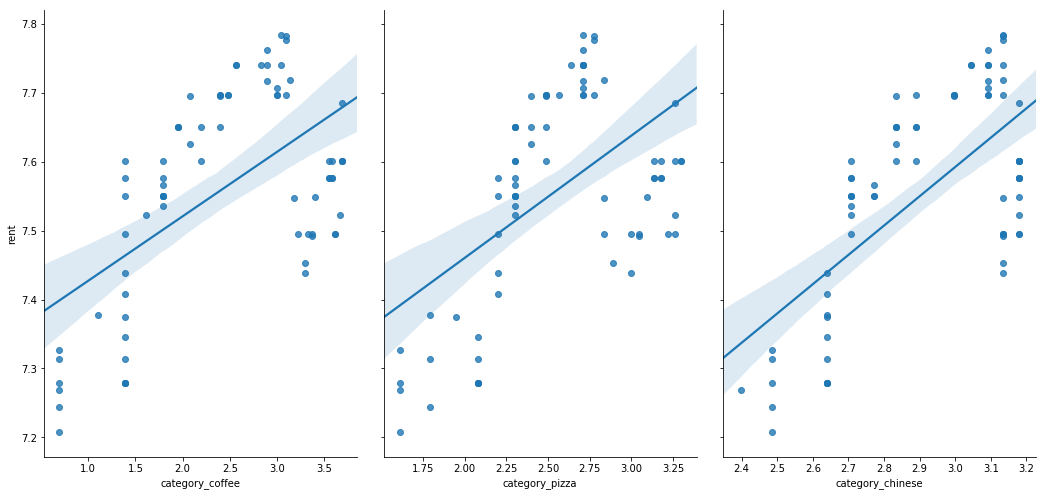

In [394]:
sns.pairplot(log_yelp_cumsum_rent_bushwick_df, x_vars=['category_coffee','category_pizza','category_chinese'], y_vars='rent', size=7, aspect=0.7, kind='reg')

In [401]:
### STATSMODELS for BAR COUNTS### 
# create a fitted model
lm1_bushwick_coffee = smf.ols(formula='rent ~ category_coffee', data=log_yelp_cumsum_rent_bushwick_df).fit()
# print the coefficients
print('< number of cafes vs. rent >')
print(lm1_bushwick_coffee.params)
display(lm1_bushwick_coffee.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1_bushwick_coffee.pvalues)
print('r-squared: '+ str(lm1_bushwick_coffee.rsquared))

< number of cafes vs. rent >
Intercept          7.333805
category_coffee    0.093449
dtype: float64


,0,1
Intercept,7.257394,7.410216
category_coffee,0.063580,0.123317


p-values: 
Intercept          1.026676e-103
category_coffee     2.367358e-08
dtype: float64
r-squared: 0.33814405358847477


In [402]:
### STATSMODELS for BAR COUNTS### 
# create a fitted model
lm1_bushwick_pizza = smf.ols(formula='rent ~ category_pizza', data=log_yelp_cumsum_rent_bushwick_df).fit()
# print the coefficients
print('< number of pizza spots vs. rent >')
print(lm1_bushwick_pizza.params)
display(lm1_bushwick_pizza.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1_bushwick_pizza.pvalues)
print('r-squared: '+ str(lm1_bushwick_pizza.rsquared))

< number of pizza spots vs. rent >
Intercept         7.105520
category_pizza    0.177441
dtype: float64


,0,1
Intercept,6.942081,7.268958
category_pizza,0.114132,0.240750


p-values: 
Intercept         1.046821e-77
category_pizza    3.508871e-07
dtype: float64
r-squared: 0.29078651586814164


In [403]:
### STATSMODELS for BAR COUNTS### 
# create a fitted model
lm1_bushwick_chinese = smf.ols(formula='rent ~ category_chinese', data=log_yelp_cumsum_rent_bushwick_df).fit()
# print the coefficients
print('< number of chinese spots vs. rent >')
print(lm1_bushwick_chinese.params)
display(lm1_bushwick_chinese.conf_int())
# null hypothesis - there is no relationship bet. # of bars and rent
print('p-values: ')
print(lm1_bushwick_chinese.pvalues)
print('r-squared: '+ str(lm1_bushwick_chinese.rsquared))

< number of chinese spots vs. rent >
Intercept           6.317389
category_chinese    0.424944
dtype: float64


,0,1
Intercept,6.000357,6.634421
category_chinese,0.316565,0.533323


p-values: 
Intercept           1.464627e-52
category_chinese    2.551012e-11
dtype: float64
r-squared: 0.4451871505573325


In [404]:
# combine them all to see if it performs better
lm1_multivariable_bushwick = smf.ols(formula='rent ~ category_coffee + category_pizza + category_chinese', data=log_yelp_cumsum_rent_bushwick_df).fit()

# print the coefficients
lm1_multivariable_bushwick.params

Intercept           2.775553
category_coffee    -0.410291
category_pizza      0.051241
category_chinese    1.930227
dtype: float64

In [405]:
lm1_multivariable_bushwick.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     40.51
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.35e-15
Time:                        12:06:12   Log-Likelihood:                 75.251
No. Observations:                  78   AIC:                            -142.5
Df Residuals:                      74   BIC:                            -133.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7756      0.718      3.866      0.000       1.345       4.206
category_coffee     -0.4103      0.107     -3.819      0.000      -0.624      -0.196
category_pizza       0.0512      0.130      0.394      0.694      -0.208       0.310
category_chinese     1.9302      0.272      7.093      0.000       1.388       2.472
==============================================================================
Omnibus:                        1.257   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.053
Skew:                          -0.010   Prob(JB):                        0.591
Kurtosis:                       2.431   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# yelp_williamsburg_cumsum_perc_inc_df['rent'] = yelp_williamsburg_cumsum_perc_inc_df['rent'].astype('int')

In [34]:
yelp_williamsburg_cumsum_perc_inc_df.head()

,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_seafood,category_spanish,category_streetvendors,category_sushi,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars,%increase_rent
2011-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,0.0,0.0,0.0,0.083333,0.0,0.166667,NaN,0.0,0.142857,NaN,...,0.0,2.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667
2012-01-01,0.0,0.0,0.0,0.025641,0.0,0.000000,NaN,0.0,0.000000,inf,...,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.083333
2012-02-01,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.144423
2012-03-01,0.0,0.0,0.0,0.050000,0.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.078894


In [23]:
yelp_cumsum_rent_williamsburg_df.tail()

,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_streetvendors,category_sushi,category_tacos,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars,rent,%increase_rent
2018-04-01,7,9,52,123,6,18,4,16,29,6,...,9,12,4,20,23,14,9,13,2750,0.014760
2018-05-01,7,9,53,123,6,18,4,16,29,6,...,9,13,5,21,23,14,10,13,2750,0.000000
2018-06-01,7,9,53,125,6,18,5,16,29,6,...,9,13,7,21,23,15,10,13,2692,-0.020909
2018-07-01,7,9,53,128,6,18,6,17,29,6,...,9,14,7,21,23,16,10,13,2750,0.021356
2018-08-01,7,9,53,129,7,18,6,17,29,6,...,9,16,7,21,23,16,10,13,2790,0.014545


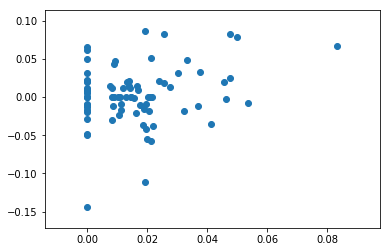

In [37]:
plt.scatter(yelp_williamsburg_cumsum_perc_inc_df['category_bars'], yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'])

In [38]:
# comparing the increase in rent prices to # of restaurant in each month
pearsons_corr = yelp_cumsum_rent_williamsburg_df.corr()
corr_to_rent = pearsons_corr['rent']
corr_to_rent = corr_to_rent.dropna()
corr_to_rent = corr_to_rent.to_frame().transpose()

In [39]:
# f, ax = plt.subplots(figsize=(20, 3))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# ax = plt.axes()
# sns.heatmap(corr_to_rent,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
# ax.set_title('heatmap')
# plt.show()

In [40]:
yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(1)
yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_2_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(2)

In [41]:
# pearson's corr for percent increase in each business vs. percent increase in rent
pearsons_corr_perc_inc  = yelp_williamsburg_cumsum_perc_inc_df.corr()
corr_to_rent_perc_inc = pearsons_corr_perc_inc['%increase_rent']
corr_to_rent_perc_inc = corr_to_rent_perc_inc.dropna()
corr_to_rent_perc_inc = corr_to_rent_perc_inc.to_frame().transpose()
corr_to_rent_perc_inc = corr_to_rent_perc_inc.loc[:, :'category_wine_bars']

# pearson's corr for percent increase in each business vs. percent increase in rent a month later
corr_to_rent_perc_inc_month = pearsons_corr_perc_inc["%increase_rent_month_later"]
corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.dropna()
corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.to_frame().transpose()
corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.loc[:, :'category_wine_bars']

# pearson's corr for percent increase in each business vs. percent increase in rent a month later
corr_to_rent_perc_inc_2_month = pearsons_corr_perc_inc["%increase_rent_2_month_later"]
corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.dropna()
corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.to_frame().transpose()
corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.loc[:, :'category_wine_bars']

In [408]:
corr_to_rent_perc_inc

,category_asianfusion,category_bagels,category_bakeries,category_bars,category_bbq,category_breakfast_brunch,category_bubbletea,category_burgers,category_cafes,category_chicken_wings,...,category_sandwiches,category_seafood,category_spanish,category_streetvendors,category_sushi,category_thai,category_tradamerican,category_vegan,category_vietnamese,category_wine_bars
%increase_rent,-0.172361,0.150094,0.150773,0.242933,-0.002107,0.075431,0.103063,-0.079838,0.155443,-0.043636,...,0.150378,0.047336,0.138764,0.04003,-0.038666,0.022371,0.066781,0.116903,0.170538,-0.003582


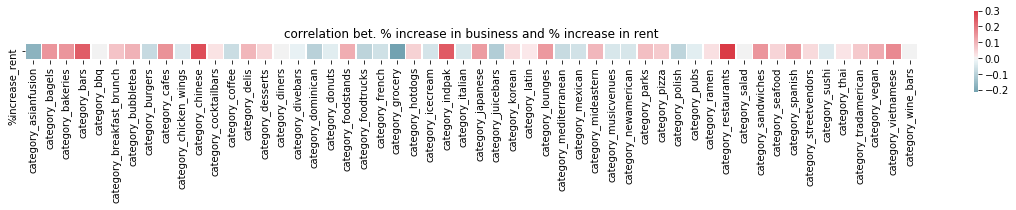

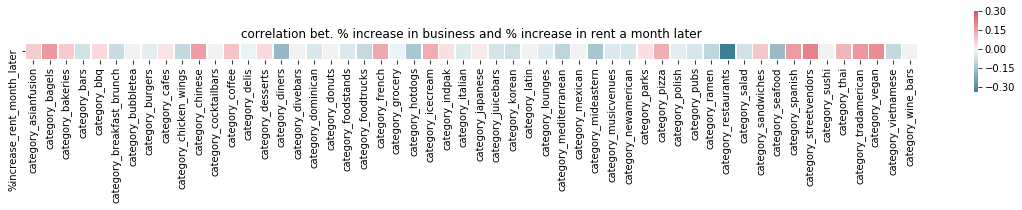

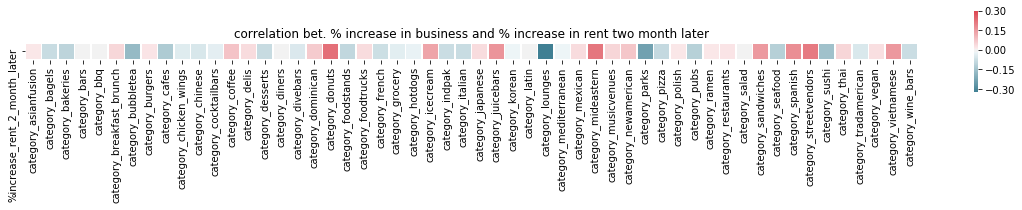

In [42]:
f, ax = plt.subplots(figsize=(20, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = plt.axes()
sns.heatmap(corr_to_rent_perc_inc,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
ax.set_title('correlation bet. % increase in business and % increase in rent')
plt.show()

f, ax = plt.subplots(figsize=(20, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = plt.axes()
sns.heatmap(corr_to_rent_perc_inc_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
ax.set_title('correlation bet. % increase in business and % increase in rent a month later')
plt.show()

f, ax = plt.subplots(figsize=(20, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = plt.axes()
sns.heatmap(corr_to_rent_perc_inc_2_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
ax.set_title('correlation bet. % increase in business and % increase in rent two month later')
plt.show()

#### Multivariable Linear Regression
* also see if the increase in business a month before, or 2 month before would affect anything

In [44]:
# yelp_williamsburg_cumsum_perc_inc_df = yelp_williamsburg_cumsum_perc_inc_df.drop(['rent','category_tacos'], axis = 1)

In [45]:
yelp_williamsburg_cumsum_perc_inc_df_cleaned = yelp_williamsburg_cumsum_perc_inc_df[yelp_williamsburg_cumsum_perc_inc_df.index>'2011-11-01']

In [53]:
# remove columns with null
col_with_null = yelp_williamsburg_cumsum_perc_inc_df_cleaned.columns[yelp_williamsburg_cumsum_perc_inc_df_cleaned.isna().any()].tolist()
col_with_null

['category_bubbletea',
 'category_chicken_wings',
 'category_juicebars',
 'category_mediterranean',
 '%increase_rent_month_later',
 '%increase_rent_2_month_later']

In [57]:
yelp_williamsburg_cumsum_perc_inc_df_cleaned = yelp_williamsburg_cumsum_perc_inc_df_cleaned.drop(col_with_null, axis = 1)
X = yelp_williamsburg_cumsum_perc_inc_df_cleaned.loc[:,:'category_wine_bars']
y = yelp_williamsburg_cumsum_perc_inc_df_cleaned[['%increase_rent']]

In [58]:
X_train_cumsum, X_test_cumsum, y_train_cumsum, y_test_cumsum = train_test_split(X, y)

In [59]:
ols = linreg.LinearRegression()
ols.fit(X_train_cumsum, y_train_cumsum)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
pred = ols.predict(X_train_cumsum)

In [61]:
def rss(y, y_hat):
    return ((y_hat - y)**2).sum().values

In [62]:
print('RSS Training: {}'.format(rss(y_train_cumsum, ols.predict(X_train_cumsum)) ))
print('RSS Test: {}'.format(rss(y_test_cumsum, ols.predict(X_test_cumsum)) ))

RSS Training: [0.0178542]
RSS Test: [0.45171486]


Linear Regression model above is overfitting -> feature selection and regularization to improve the outcome

#### Greedy Approach

1. loop through all the features and find the feature that produces the lowest Mean squared test error.

In [63]:
min_test_err = 10**100 
best_feat = None

def mse(residual_col):
    return (residual_col**2).mean().values[0]

for feat in X.columns:
    linreg_ = linreg.LinearRegression()
    cur_X_train = np.array(X_train_cumsum[feat]).reshape(-1, 1)
    cur_X_test = np.array(X_test_cumsum[feat]).reshape(-1, 1)
    linreg_.fit(cur_X_train, y_train_cumsum)
    y_hat_test = linreg_.predict(cur_X_test)
    test_err = mse(y_hat_test-y_test_cumsum)
#     print(feat, round(test_err,2))
    if  test_err < min_test_err:
        min_test_err = test_err
        best_feat = feat
print('The single best predictor was: {}'.format(feat))

The single best predictor was: category_wine_bars


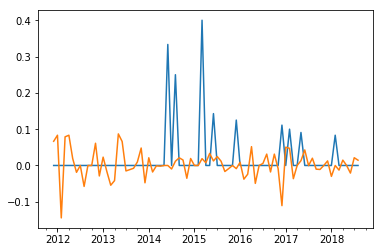

In [64]:
yelp_williamsburg_cumsum_perc_inc_df_cleaned['category_wine_bars'].plot()
yelp_williamsburg_cumsum_perc_inc_df_cleaned['%increase_rent'].plot()

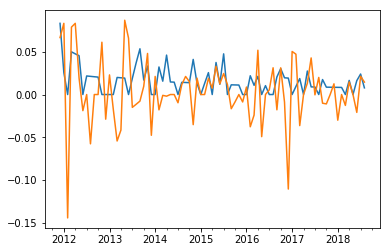

In [65]:
yelp_williamsburg_cumsum_perc_inc_df_cleaned['category_bars'].plot()
yelp_williamsburg_cumsum_perc_inc_df_cleaned['%increase_rent'].plot()

In [66]:
def best_feat(X_train, X_test, y_train, y_test, feat_options, prev_feats=[]):
        min_test_err = 10**100 #Create an incredibly high initialization val
        best_feat = None
        for feat in feat_options:
            linreg_ = linreg.LinearRegression()
            if prev_feats == []:
                cur_X_train = np.array(X_train_cumsum[feat]).reshape(-1, 1)
                cur_X_test = np.array(X_test_cumsum[feat]).reshape(-1, 1)
            else:
                feats = prev_feats + [feat]
                cur_X_train = X_train_cumsum[feats]
                cur_X_test = X_test_cumsum[feats]
            linreg_.fit(cur_X_train, y_train_cumsum)
            y_hat_test = linreg_.predict(cur_X_test)
            test_err = mse(y_hat_test-y_test_cumsum)
            if  test_err < min_test_err:
                min_test_err = test_err
                best_feat = feat
        return best_feat

In [67]:
def linreg_greedy_feat(n_feats, X_train, X_test, y_train, y_test):
    #Your code here
    cur_model_feats = []
    remaining_feats = list(X.columns)
    for n in range(1,n_feats+1):
        next_feat = best_feat(X_train, X_test, y_train, y_test,
                              feat_options=remaining_feats, prev_feats = cur_model_feats)
        cur_model_feats.append(next_feat)
        remaining_feats.remove(next_feat)
    model = linreg.LinearRegression()
    model.fit(X_train[cur_model_feats], y_train)
    return model, cur_model_feats

In [389]:
# start = datetime.datetime.now()
# for i in range(2,21):
#     cycle_start = datetime.datetime.now()
#     #print('On iteration: {}'.format(i-1))
#     #Train Greedy Classifier Model with this many features
#     model, cur_model_feats = linreg_greedy_feat(i, X_train_cumsum, X_test_cumsum, y_train_cumsum, y_test_cumsum)
#     model.fit(X_train_cumsum[cur_model_feats], y_train_cumsum)
    
#     #Calculate Training Mean Squared Error
#     y_hat_train = model.predict(X_train_cumsum[cur_model_feats])
#     train_err = mse(y_hat_train-y_train_cumsum)
    
#     #Calculate Test Mean Squared Error
#     y_hat_test = model.predict(X_test_cumsum[cur_model_feats])
#     test_err = mse(y_hat_test-y_test_cumsum)
    
#     #Plot Results
#     if i ==2:
#         plt.scatter(i, train_err, c='red', label='Train Error')
#         plt.scatter(i, test_err, c='orange', label='Test Error')
#     else:
#         plt.scatter(i, train_err, c='red')
#         plt.scatter(i, test_err, c='orange')
#     end = datetime.datetime.now()
#     cycle_time = end - cycle_start
#     elapsed = end - start
# #     print('Cycle took: {}'.format(cycle_time))
# #     print('Total time elapsed: {}'.format(elapsed))

# #Add Legend and Descriptive Title/Axis Labels
# plt.legend(bbox_to_anchor=(1,1))
# plt.ylim(0, 0.01)
# plt.ylabel('MSE')
# plt.xlabel('Number of Features in Model')
# plt.title('MSE versus Number of Features Incorporated into Model')

### Time Series - ARIMAX

In [156]:
import pyflux as pf
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [146]:
def stationarity_check(TS):
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window=12).mean() # Change window size for different lags
    rolstd = TS.rolling(window=12).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS, autolag='AIC') # change the passengers column as required 
    
    #Plot rolling statistics:
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

In [110]:
yelp_williamsburg_cumsum_perc_inc_df_arimax = yelp_williamsburg_cumsum_perc_inc_df.loc[:,:'%increase_rent']

In [138]:
rent_williamsburg = yelp_cumsum_rent_williamsburg_df['rent']

In [139]:
yelp_williamsburg_cumsum_df_arimax = pd.concat([yelp_williamsburg_cumsum_perc_inc_df_arimax, rent_williamsburg], axis =1 )

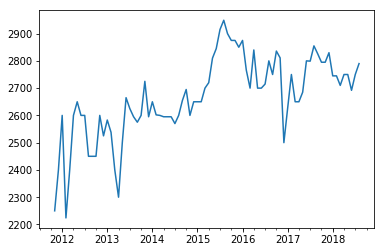

In [151]:
rent_williamsburg.plot()

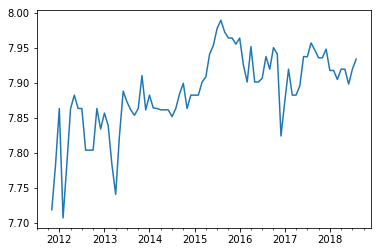

In [152]:
log_yelp_williamsburg_cumsum_df_arimax.plot()

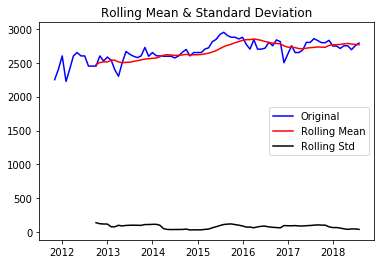

Results of Dickey-Fuller Test:
Test Statistic                 -2.000494
p-value                         0.286356
#Lags Used                      2.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [153]:
log_yelp_williamsburg_cumsum_df_arimax = np.log(yelp_williamsburg_cumsum_df_arimax['rent'])
log_diff_yelp_williamsburg_cumsum_df_arimax = yelp_williamsburg_cumsum_df_arimax['rent'] - log_yelp_williamsburg_cumsum_df_arimax
stationarity_check(yelp_williamsburg_cumsum_df_arimax['rent'])

In [111]:
yelp_williamsburg_cumsum_perc_inc_df_arimax = yelp_williamsburg_cumsum_perc_inc_df_arimax[yelp_williamsburg_cumsum_perc_inc_df_arimax.index>'2011-11-01']
yelp_williamsburg_cumsum_perc_inc_df_arimax = yelp_williamsburg_cumsum_perc_inc_df_arimax.reset_index()

In [100]:
yelp_williamsburg_cumsum_perc_inc_df_arimax = yelp_williamsburg_cumsum_perc_inc_df_arimax.reset_index()

In [128]:
model = SARIMAX(endog = yelp_williamsburg_cumsum_perc_inc_df_arimax['%increase_rent'], exog = yelp_williamsburg_cumsum_perc_inc_df_arimax['category_bars'], order = (1,1,1))
fitted = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [131]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:         %increase_rent   No. Observations:                   81
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 150.075
Date:                Sat, 29 Sep 2018   AIC                           -292.150
Time:                        04:12:35   BIC                           -282.622
Sample:                    12-01-2011   HQIC                          -288.330
                         - 08-01-2018                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
category_bars     0.5877      0.215      2.728      0.006       0.165       1.010
ar.L1            -0.1941      0.108     -1.791      0.073      -0.406       0.018
ma.L1            -0.9973      1.302     -0.766      0.444      -3.548       1.554
sigma2            0.0013      0.002      0.792      0.429      -0.002       0.005
===================================================================================
Ljung-Box (Q):                       34.78   Jarque-Bera (JB):                42.83
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.85
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
pred_in = fitted.predict()
pred_in.name = 'pred_in'

# comp_in = pd.concat((endog_train, pred_in), axis=1)
# comp_in.loc['2017-02-01':'2017-02-07'].plot()

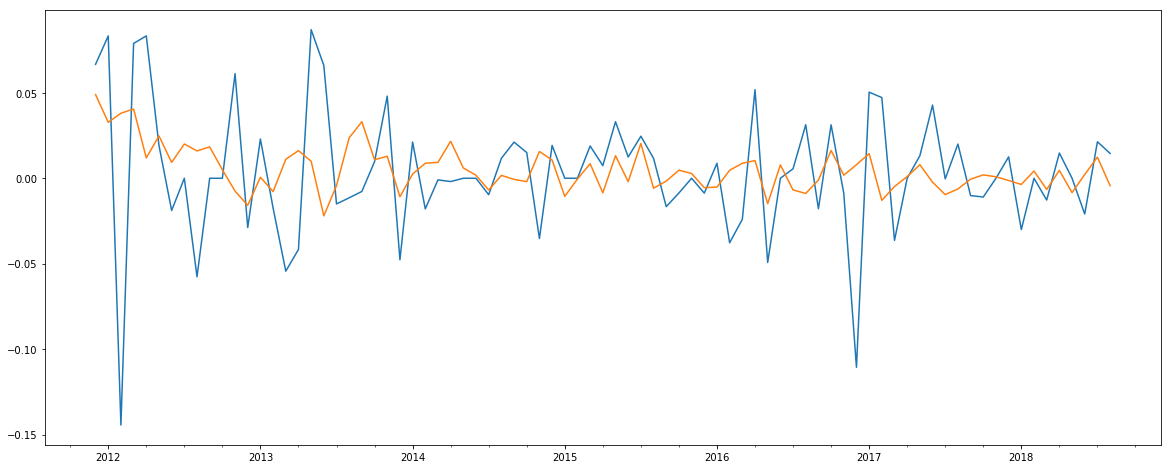

In [242]:
plt.figure(figsize=(20, 8))
yelp_williamsburg_cumsum_perc_inc_df_arimax['%increase_rent'].plot()
pred_in.plot()

In [119]:
train = yelp_williamsburg_cumsum_perc_inc_df_arimax[yelp_williamsburg_cumsum_perc_inc_df_arimax.index<'2016-11-01']
test = yelp_williamsburg_cumsum_perc_inc_df_arimax[yelp_williamsburg_cumsum_perc_inc_df_arimax.index>='2016-11-01']

In [120]:
model = SARIMAX(endog = train['%increase_rent'], exog = train['category_bars'], order = (1,1,1))
model.fit()

In [451]:
# model.predict(test)

In [157]:
def ts_diagnostics(y, lags=None, title=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    Modified from http://dacatay.com/data-science/part-3-time-series-stationarity-python/
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # weekly moving averages (5 day window because of workdays)
    rolling_mean = y.rolling(window=12).mean()
    rolling_std = y.rolling(window=12).std()

    plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))

    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson', label='rolling-mean');
    rolling_std.plot(ax=ts_ax, color='darkslateblue', label='rolling-std');
    ts_ax.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);

    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')

    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.show()

    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

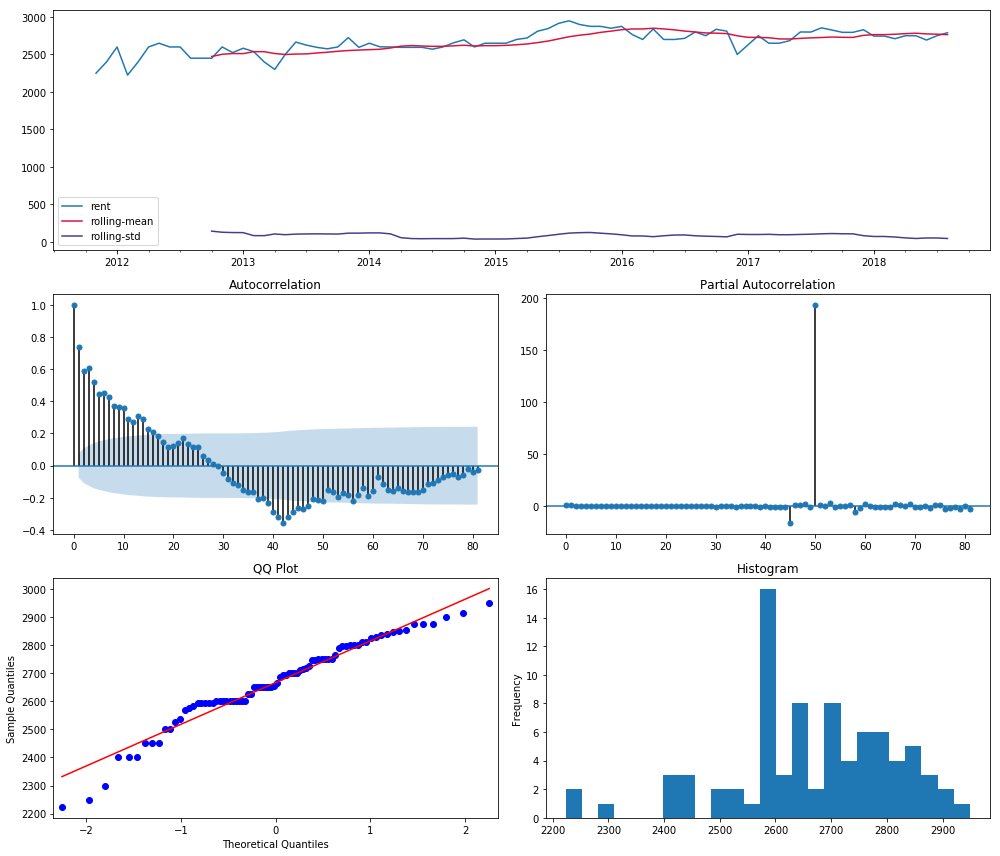

Results of Dickey-Fuller test:
test statistic          -2.000494
p-value                  0.286356
# of lags                2.000000
# of observations       79.000000
Critical Value (1%)     -3.515977
Critical Value (5%)     -2.898886
Critical Value (10%)    -2.586694
dtype: float64


In [158]:
ts_diagnostics(rent_williamsburg)

In [159]:
rolmean_log = log_yelp_williamsburg_cumsum_df_arimax.rolling(window=12).mean()
rolstd_log = log_yelp_williamsburg_cumsum_df_arimax.rolling(window=12).std()
rent_studio_williamsburg_log_moving_avg_diff = log_yelp_williamsburg_cumsum_df_arimax - rolmean_log
rent_studio_williamsburg_log_moving_avg_diff.head(15)

2011-11-01         NaN
2011-12-01         NaN
2012-01-01         NaN
2012-02-01         NaN
2012-03-01         NaN
2012-04-01         NaN
2012-05-01         NaN
2012-06-01         NaN
2012-07-01         NaN
2012-08-01         NaN
2012-09-01         NaN
2012-10-01   -0.007749
2012-11-01    0.039626
2012-12-01    0.006125
2013-01-01    0.029382
Freq: MS, Name: rent, dtype: float64

In [160]:
rent_studio_williamsburg_log_moving_avg_diff = rent_studio_williamsburg_log_moving_avg_diff.dropna()

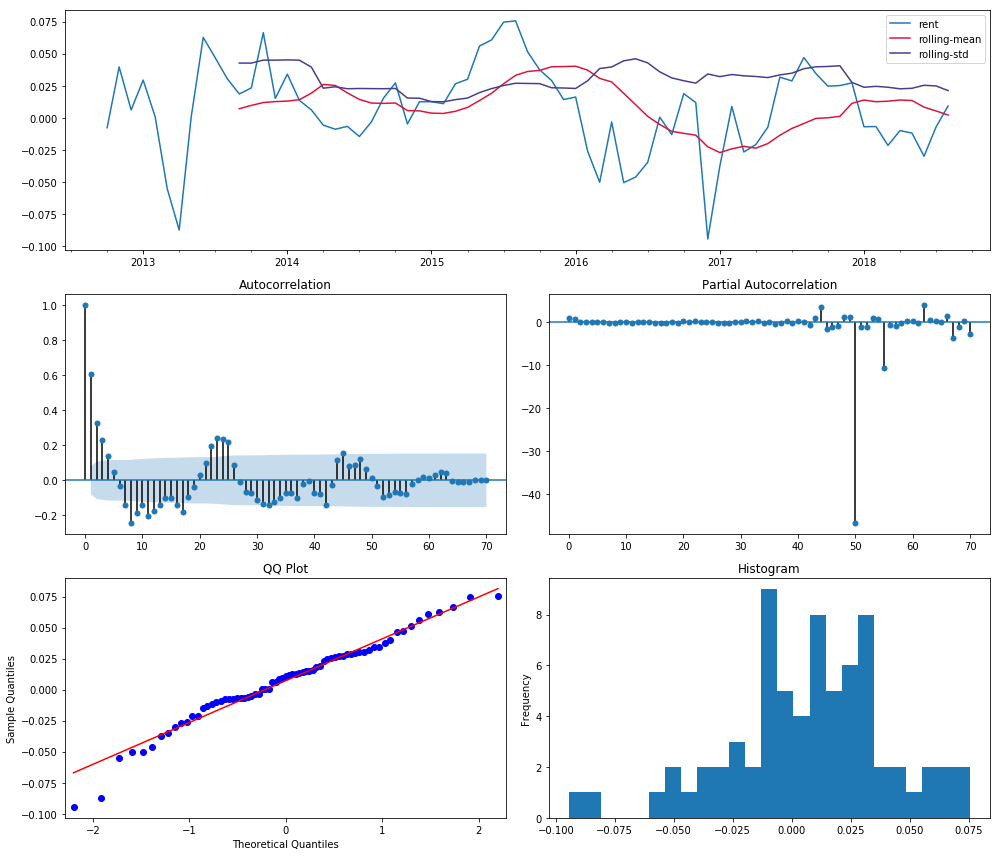

Results of Dickey-Fuller test:
test statistic          -4.087695
p-value                  0.001015
# of lags                0.000000
# of observations       70.000000
Critical Value (1%)     -3.527426
Critical Value (5%)     -2.903811
Critical Value (10%)    -2.589320
dtype: float64


In [161]:
ts_diagnostics(rent_studio_williamsburg_log_moving_avg_diff)

In [167]:
exog_log = yelp_williamsburg_cumsum_perc_inc_df_arimax['category_bars'][yelp_williamsburg_cumsum_perc_inc_df_arimax['category_bars'].index>='2012-10-01']

In [168]:
model_log = SARIMAX(endog = rent_studio_williamsburg_log_moving_avg_diff, exog = exog_log, order = (1,1,1))
fitted_log = model_log.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [170]:
fitted_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   rent   No. Observations:                   71
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 152.316
Date:                Sat, 29 Sep 2018   AIC                           -296.631
Time:                        11:18:37   BIC                           -287.637
Sample:                    10-01-2012   HQIC                          -293.059
                         - 08-01-2018                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
category_bars    -0.1144      0.227     -0.503      0.615      -0.560       0.331
ar.L1             0.6282      0.107      5.848      0.000       0.418       0.839
ma.L1            -0.9992      2.996     -0.333      0.739      -6.872       4.873
sigma2            0.0007      0.002      0.345      0.730      -0.003       0.005
===================================================================================
Ljung-Box (Q):                       23.31   Jarque-Bera (JB):                20.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.67
Prob(H) (two-sided):                  0.76   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

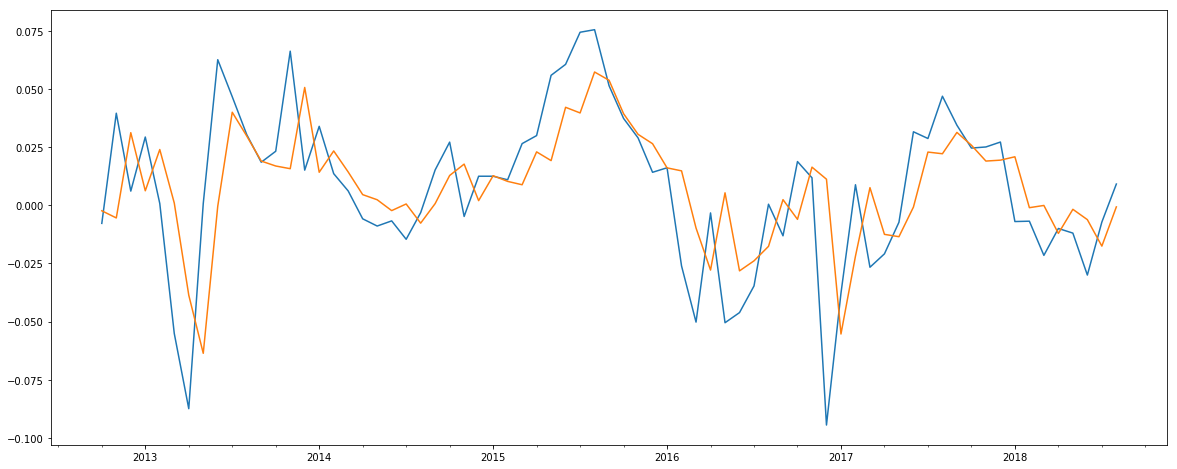

In [418]:
pred_in_log = fitted_log.predict()
pred_in_log.name = 'pred_in_log'

plt.figure(figsize=(20, 8))
rent_studio_williamsburg_log_moving_avg_diff.plot()
pred_in_log.plot()

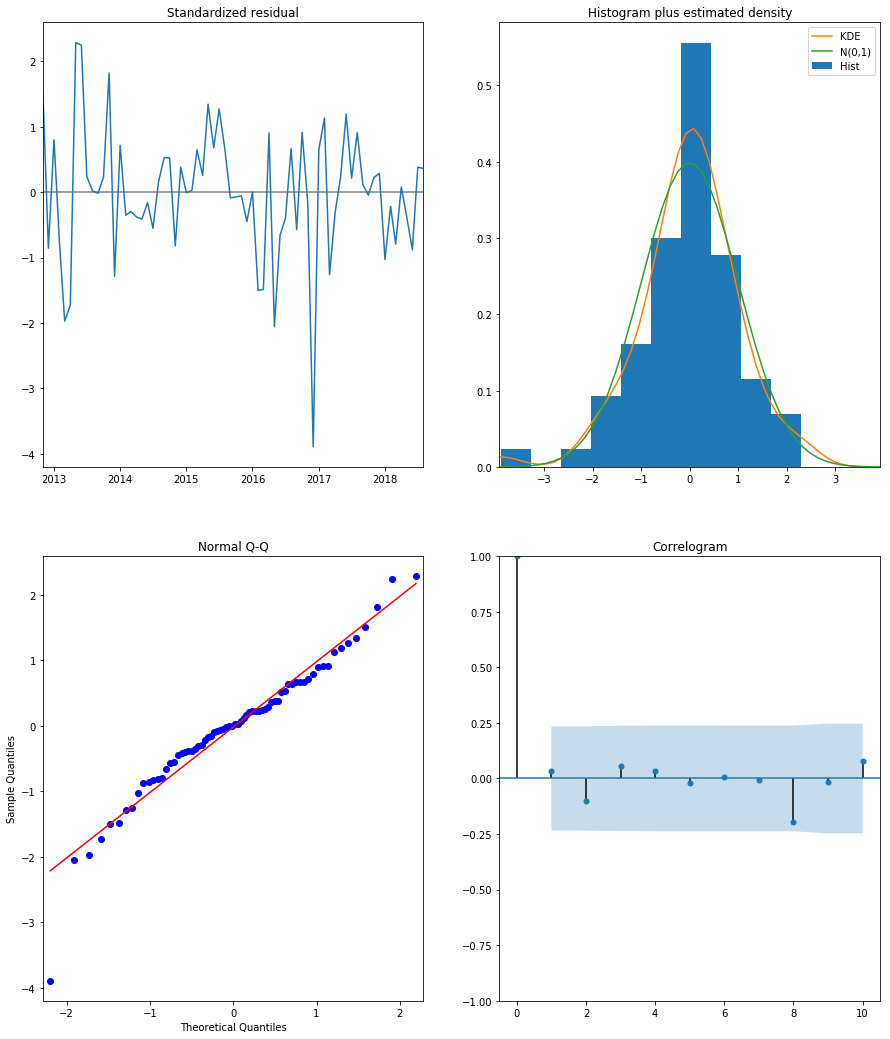

In [175]:
fitted_log.plot_diagnostics(figsize=(15, 18))
plt.show()

In [445]:
pred = fitted_log.get_prediction(start=pd.to_datetime('2017-01'), dynamic=False)
pred_conf = pred.conf_int()

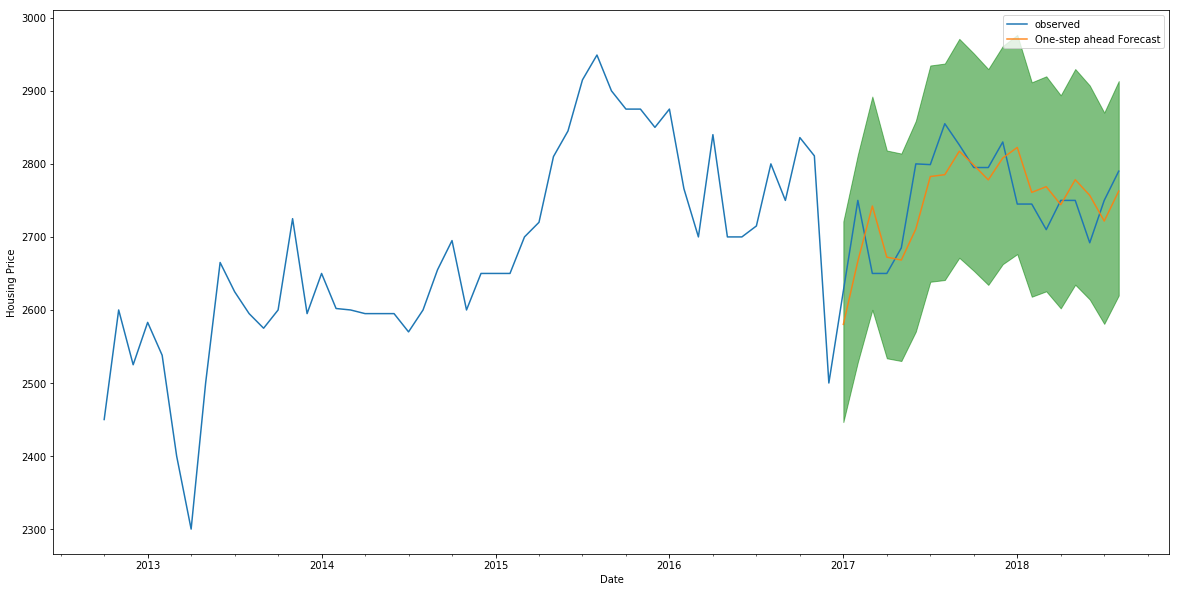

In [446]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
#Plot observed values
ax = (np.exp((rent_studio_williamsburg_log_moving_avg_diff+rolmean_log)).plot(label='observed'))

#Plot predicted values
(np.exp((pred.predicted_mean)+rolmean_log)).plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(rolmean_log.index,
                np.exp(pred_conf.iloc[:,0]+rolmean_log),
                np.exp(pred_conf.iloc[:,1]+rolmean_log), color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
plt.legend()

plt.show()

In [449]:
rent_williamsburg_forecasted = np.exp((pred.predicted_mean)+rolmean_log)
rent_williamsburg_forecasted = rent_williamsburg_forecasted[rent_williamsburg_forecasted.index>='2017-01']
rent_williamsburg_truth = np.exp((rent_studio_williamsburg_log_moving_avg_diff[rent_studio_williamsburg_log_moving_avg_diff.index>='2017-01'] + rolmean_log[rolmean_log.index>='2014-11-01']))

# Compute the mean square error
mse = ((rent_williamsburg_forecasted - rent_williamsburg_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2428.22
